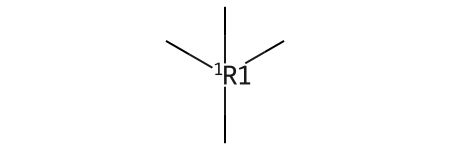

In [8]:
import os
from rdkit import Chem
from rdkit.Chem.Draw import ShowMol
from rdkit.Chem import rdFMCS
from rdkit.Chem import rdchem
from markmol import MarkMol

structure_dir = os.path.join(os.getcwd(), "marvin")
filename = "ext3.sdf"
filedir = os.path.join(structure_dir, "test9.mol")

#with open(os.path.join(structure_dir, filename), "r") as file:
#    name = os.path.abspath(file.name)
#    markinchi_obj = MarkMol(name)
    

with open(filedir) as file:
    content = file.readlines()

new_content = ""
writing = True
for line in content:
    if line.find("BEGIN RGROUP") != -1:
        writing = False
    if writing:
        new_content += line
    if line.find("END RGROUP") != -1:
        writing = True

mol = Chem.MolFromMolBlock(new_content)
mol

In [89]:
mol1 = Chem.MolFromInchi("InChI=1S/C7H8/c1-7-5-3-2-4-6-7/h2-6H,1H3")
mol2 = Chem.MolFromInchi("InChI=1S/C6H5Cl/c7-6-4-2-1-3-5-6/h1-5H")
mol3 = Chem.MolFromInchi("InChI=1S/C6H6/c1-2-4-6-5-3-1/h1-6H")

mols = [mol1, mol2, mol3]

for mol in mols:
    mol = addAtomLabels(mol)

res = rdFMCS.FindMCS(mols)
core = Chem.MolFromSmarts(res.smartsString)
core = addAtomLabels(core)

#ShowMol(core)
#ShowMol(mol1)

r_groups = []
for i in range(core.GetNumAtoms()):
    r_groups.append([])

for mol in mols:
    submap = mol.GetSubstructMatch(core)
    r_groups = add_subgroups(mol, submap, r_groups)

print(r_groups)

[[], [], [], [6, 17], [], []]


In [44]:
s = 

7


In [1]:
import MarkinchiGenerator
file = os.path.join(os.getcwd(), "marvin/test2.sdf")
generator = MarkinchiGenerator.MarkinchiGenerator(file)
generator.get_core()


NameError: name 'os' is not defined